# Project Business Statistics: Advanced Statistics Coded

**Marks: 60**

##Problem 1
A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.
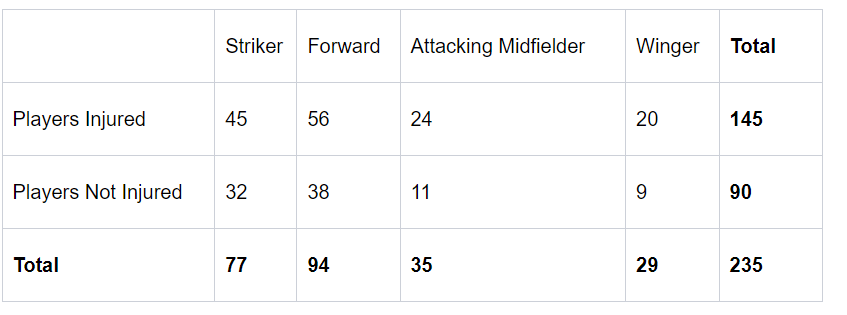




Based on the above data, answer the following questions.

1.1 What is the probability that a randomly chosen player would suffer an injury?

1.2 What is the probability that a player is a forward or a winger?

1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

1.4 What is the probability that a randomly chosen injured player is a striker?

### Import all the necessary libraries

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [31]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Mounted at /content/drive


### Define the Data

In [4]:
# Define the data
injuries = np.array([45, 56, 24, 20])
no_injuries = np.array([32, 38, 11, 9])

In [5]:
# Total players in each position
total_players = injuries + no_injuries

#1.1 What is the probability that a randomly chosen player would suffer an injury?

In [7]:
# Calculate probabilities
probability_injury = sum(injuries) / sum(total_players)
print("Ans: 1.1 Probability of a randomly chosen player suffering an injury:", probability_injury)



Ans: 1.1 Probability of a randomly chosen player suffering an injury: 0.6170212765957447


#1.2 What is the probability that a player is a forward or a winger?

In [8]:
probability_forward_or_winger = (sum(injuries[1:3]) + sum(no_injuries[1:3])) / sum(total_players)
print("Ans 1.2 Probability of a player being a forward or a winger:", probability_forward_or_winger)

1.2 Probability of a player being a forward or a winger: 0.548936170212766


# 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [9]:
probability_striker_and_injury = injuries[0] / sum(total_players)
print("Ans 1.3 Probability of a randomly chosen player playing as a striker and having a foot injury:", probability_striker_and_injury)


Ans 1.3 Probability of a randomly chosen player playing as a striker and having a foot injury: 0.19148936170212766


#1.4 What is the probability that a randomly chosen injured player is a striker?

In [10]:
probability_injured_striker = injuries[0] / sum(injuries)

print("Ans 1.4 Probability of a randomly chosen injured player being a striker:", probability_injured_striker)

Ans 1.4 Probability of a randomly chosen injured player being a striker: 0.3103448275862069


##Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

## 2.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [28]:
# define constants
x=3.17
mu = 5
sigma = 1.5
z = (x-mu)/sigma
print(z)
# Finding Required probability
prob1 = stats.norm.cdf(z)
print("proportion of the gunny bags have a breaking strength  of less than 3.17 Kg per sq cm is  ", prob1)

-1.22
proportion of the gunny bags have a breaking strength  of less than 3.17 Kg per sq cm is   0.11123243744783456


##2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

In [26]:
# define constants
x=3.6
mu = 5
sigma = 1.5
z = (x-mu)/sigma
print(z)
# Finding Required probability
prob2 = 1 - stats.norm.cdf(z)
print("proportion of the gunny bags have a breaking strength  of atleast 3.6 Kg per sq cm is  ", prob2)

-0.9333333333333332
proportion of the gunny bags have a breaking strength  of atleast 3.6 Kg per sq cm is   0.8246760551477705


##2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [21]:
# define constants
mu = 5
sigma = 1.5
x1 = 5
x2 = 5.5
z1 = (x1-mu)/sigma
z2 = (x2-mu)/sigma
# Finding Required probability
prob3 = stats.norm.cdf(z2) - stats.norm.cdf(z1)
print("proportion of the gunny bags have a breaking strength  between 5 and 5.5 kg per sq cm. is  ", prob3)

proportion of the gunny bags have a breaking strength  between 5 and 5.5 kg per sq cm. is   0.13055865981823633


##2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
# define constants
mu = 5
sigma = 1.5
x1 = 3
x2 = 7.5
# Finding Required probability
prob = 1 + norm.cdf(x1,mu,sigma) - norm.cdf(x2,mu,sigma)
print("proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm. is  ", prob)

proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm. is   0.13900157199868257


## Visual Representation in Graph

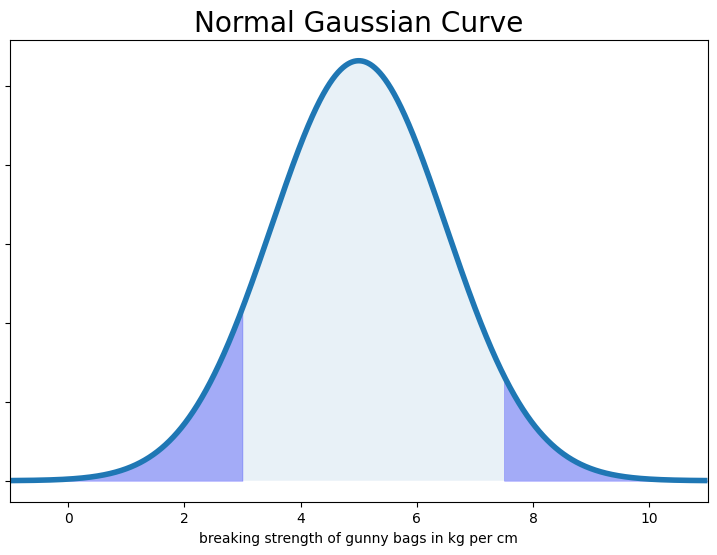

In [14]:
# define constants
mu = 5
sigma = 1.5
x1 = 3
x2 = 7.5

x_2 = np.arange(x2,11, 0.001) # range of x in spec
x_1 = np.arange(-1,x1, 0.001)
x_all = np.arange(-1,11, 0.001) # entire range of x, both in and out of spec
y_1 = norm.pdf(x_1,mu,sigma)
y_2 = norm.pdf(x_2,mu,sigma)
y_all = norm.pdf(x_all,mu,sigma)

# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y_all)
ax.fill_between(x_1,y_1,0, alpha=0.3, color='b')
ax.fill_between(x_2,y_2,0, alpha=0.3, color='b')
ax.fill_between(x_all,y_all,0, alpha=0.1)
ax.set_xlim([-1,11])
ax.set_xlabel('breaking strength of gunny bags in kg per cm')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')
plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

##Problem 3
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

3.2 Is the mean hardness of the polished and unpolished stones the same?

In [32]:
# Load the data for zingaro company
df = pd.read_csv('/content/drive/MyDrive/Python Course/Zingaro_Company.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

#### Displaying the first few rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


#### Displaying the last few rows of the dataset

In [ ]:
# view the last 5 rows of the dataset
df.tail()

,Unpolished,Treated and Polished
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530
74,170.854823,144.502647


#### Checking the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(75, 2)

#### Checking the data types of the columns for the dataset

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


#### Getting the statistical summary for the numerical variables

In [ ]:
# Return the numerical statistical summary
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


### Check for missing values

In [ ]:
# Return the sum of null values in each column
df.isnull().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

### Check for duplicates

In [ ]:
# Return the sum of duplicate values in each column
df.duplicated().sum()

0

##3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [33]:
u_mean = df['Unpolished '].mean()
u_std = df['Unpolished '].std()
cnt =  df['Unpolished '].count()
t_stat = (u_mean - 150) / (u_std / (cnt**0.5))
p_value = stats.t.sf(abs(t_stat), cnt-1)
#print ('u mean',u_mean)
#print ('u std',u_std)
#print('count',cnt)
#print('t stat is ',t_stat)
#print ('p value s',p_value)
if p_value < 0.05:
    print('Zingaro is justified in thinking that the unpolished stones may not be suitable for printing.')
else:
    print('Zingaro is not justified in thinking that the unpolished stones may not be suitable for printing.')

Zingaro is justified in thinking that the unpolished stones may not be suitable for printing.


##3.2 Is the mean hardness of the polished and unpolished stones the same?

In [34]:
# Two-sample t-test for polished and unpolished stones
p_mean = df['Treated and Polished'].mean()
u_mean = df['Unpolished '].mean()
p_std = df['Treated and Polished'].std()
u_std = df['Unpolished '].std()
n1 = df['Treated and Polished'].count()
n2 = df['Unpolished '].count()
sp = ((n1-1)*p_std**2 + (n2-1)*u_std**2) / (n1+n2-2)
t_stat = (p_mean - u_mean) / (sp * ((1/n1) + (1/n2)))**0.5
p_value = stats.t.sf(abs(t_stat), n1+n2-2)
if p_value < 0.05:
    print("The mean hardness of the polished and unpolished stones is different.")
else:
    print("The mean hardness of the polished and unpolished stones is the same.")

The mean hardness of the polished and unpolished stones is different.


### Problem 4
## Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.
4.1 How does the hardness of implants vary depending on dentists?

4.2 How does the hardness of implants vary depending on methods?

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

4.4 How does the hardness of implants vary depending on dentists and methods together?



In [67]:
# complete the code below to load the dataset
df_dental = pd.read_excel('/content/drive/MyDrive/Python Course/Dental+Hardness+data.xlsx')

In [ ]:
# view the first 5 rows of the dataset
df_dental.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [ ]:
df_dental.tail()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rows,513114.013889,89,5765.325999,0.778206,0.917216,1.315369
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columns,156164270.208333,3,52054756.736111,7026.375161,0.0,2.638412
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error,1978064.041667,267,7408.479557,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,158655448.263889,359,NaN,NaN,NaN,NaN


In [ ]:
df_dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [ ]:
df_dental.shape

(107, 14)

In [ ]:
df_dental.describe()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6
count,90.000000,90.000000,90.000000,90.000000,90.000000,0.0,0.0
mean,3.000000,2.000000,1.500000,1600.000000,741.777778,NaN,NaN
std,1.422136,0.821071,0.502801,82.107083,145.767845,NaN,NaN
min,1.000000,1.000000,1.000000,1500.000000,289.000000,NaN,NaN
25%,2.000000,1.000000,1.000000,1500.000000,698.000000,NaN,NaN
50%,3.000000,2.000000,1.500000,1600.000000,767.000000,NaN,NaN
75%,4.000000,3.000000,2.000000,1700.000000,824.000000,NaN,NaN
max,5.000000,3.000000,2.000000,1700.000000,1115.000000,NaN,NaN


###4.1 How does the hardness of implants vary depending on dentists?

In [63]:

#df1  = df_dental['Dentist']==2
df1 = df_dental[df_dental['Alloy'] == 1]['Response']
df2 = df_dental[df_dental['Alloy'] == 2]['Response']
#time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
#df3['Response'][df3['Dentist']==1],
t_value,p_value=stats.ttest_rel(df1,df2)

#F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

one_tailed_p_value=float("{:.6f}".format(p_value/2))

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05
if one_tailed_p_value<=alpha:

    print('We reject the null hypothesis H0.')
else:
    print('We do not reject the null hypothesis H0')


Test statistic is -3.947307
p-value for one_tailed_test is 0.000141
We reject the null hypothesis H0.


In [80]:
aov_table=sm.stats.anova_lm(model,type=2)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,1.577946e+05,39448.638889,1.945921,0.110853
C(Alloy),1.0,1.058155e+05,105815.511111,5.219663,0.024982
C(Dentist):C(Alloy),4.0,5.687044e+03,1421.761111,0.070133,0.990853
Residual,80.0,1.621798e+06,20272.480556,NaN,NaN


Since the p-value is greater than 0.05

The null hypothesis is retained and the implant hardness is not dependent on dentists

###4.2 How does the hardness of implants vary depending on methods?

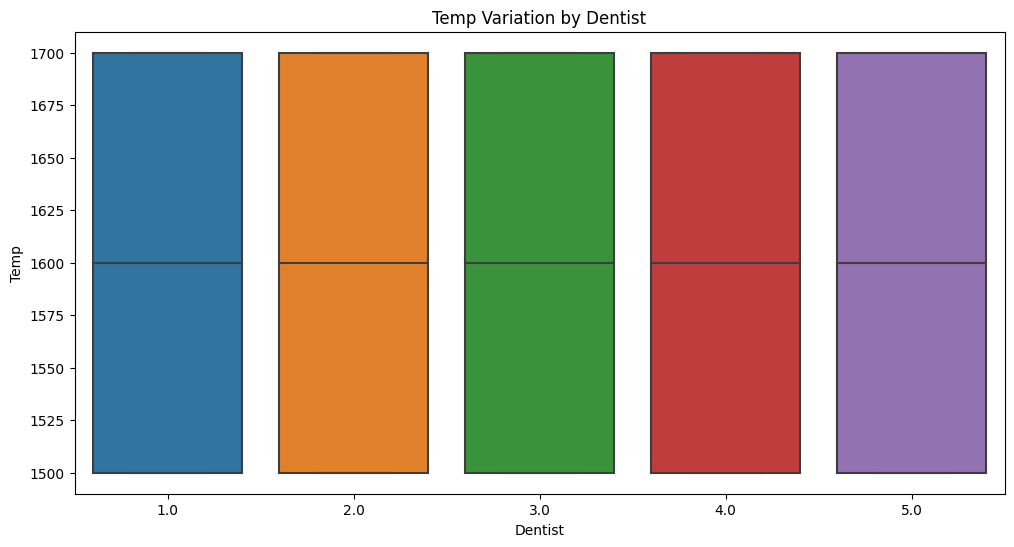

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dentist", y="Temp", data=df_dental)
plt.title("Temp Variation by Dentist")
plt.show()

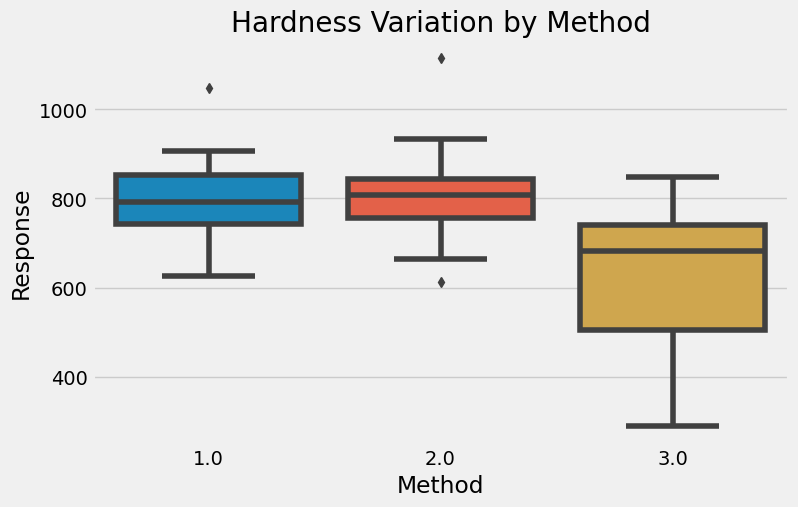

In [83]:
# Box plot to visualize the variation in hardness by method
plt.figure(figsize=(8, 5))
sns.boxplot(x="Method", y="Response", data=df_dental)
plt.title("Hardness Variation by Method")
plt.show()

In [73]:
from scipy.stats import shapiro, levene
# Check normality assumption
i = 5.
#for dentist_group in i:

test_stat, p_value = levene( df_dental['Response'][df_dental['Dentist']==1],
                             df_dental['Response'][df_dental['Dentist']==2],
                             df_dental['Response'][df_dental['Dentist']==3],
                             df_dental['Response'][df_dental['Dentist']==4],
                             df_dental['Response'][df_dental['Dentist']==5])
print('The P Value is ',p_value)
    data = df_dental[df3['Dentist'] == dentist_group]['Response']
#data =                       df_dental[df_dental['Response'][df_dental['Dentist']==1]]
#                             df3['Response'][df3['Dentist']==2],
#                             df3['Response'][df3['Dentist']==3],
#                             df3['Response'][df3['Dentist']==4],
#                             df3['Response'][df3['Dentist']==5]]

test_stat1,p_value = shapiro(data)
#test_stat, p_value = shapiro( df3['Response'][df3['Dentist']==1],
#                             df3['Response'][df3['Dentist']==3],
#                             df3['Response'][df3['Dentist']==4],
#                             df3['Response'][df3['Dentist']==5])
print('The P Value is shaprio ',p_value)
# Check homogeneity of variances assumption
#levenes_results = levene(*[df[df['Dentist'] == dentist_group]['Response'] for dentist_group in df['dentist'].unique()])
#print("Levene's test p-value:", levenes_results.pvalue)

The P Value is  0.007858817382355401
The P Value is shaprio  0.1856756955385208


In [81]:

model = ols('Response ~ C(Method) * C(Alloy)', data=df_dental).fit()
aov_table=sm.stats.anova_lm(model,type=2)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,5.934275e+05,296713.744444,21.917576,2.189867e-08
C(Alloy),1.0,1.058155e+05,105815.511111,7.816354,6.415387e-03
C(Method):C(Alloy),2.0,5.468509e+04,27342.544444,2.019732,1.390848e-01
Residual,84.0,1.137167e+06,13537.707937,NaN,NaN


Since the p- value is less than 0.05 the null hypothesis is rejected and therefore the implant
hardness is dependent on the method used

##4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

In [86]:
# we can use Anova to access the interaction effect
model = ols('Response ~ Dentist * Method', data=df_dental).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                      sum_sq    df          F        PR(>F)
Dentist         1.465472e+05   1.0  10.385174  1.795039e-03
Method          4.173336e+05   1.0  29.574648  4.970469e-07
Dentist:Method  1.136521e+05   1.0   8.054037  5.662740e-03
Residual        1.213563e+06  86.0        NaN           NaN


####4.4 How does the hardness of implants vary depending on dentists and methods together?

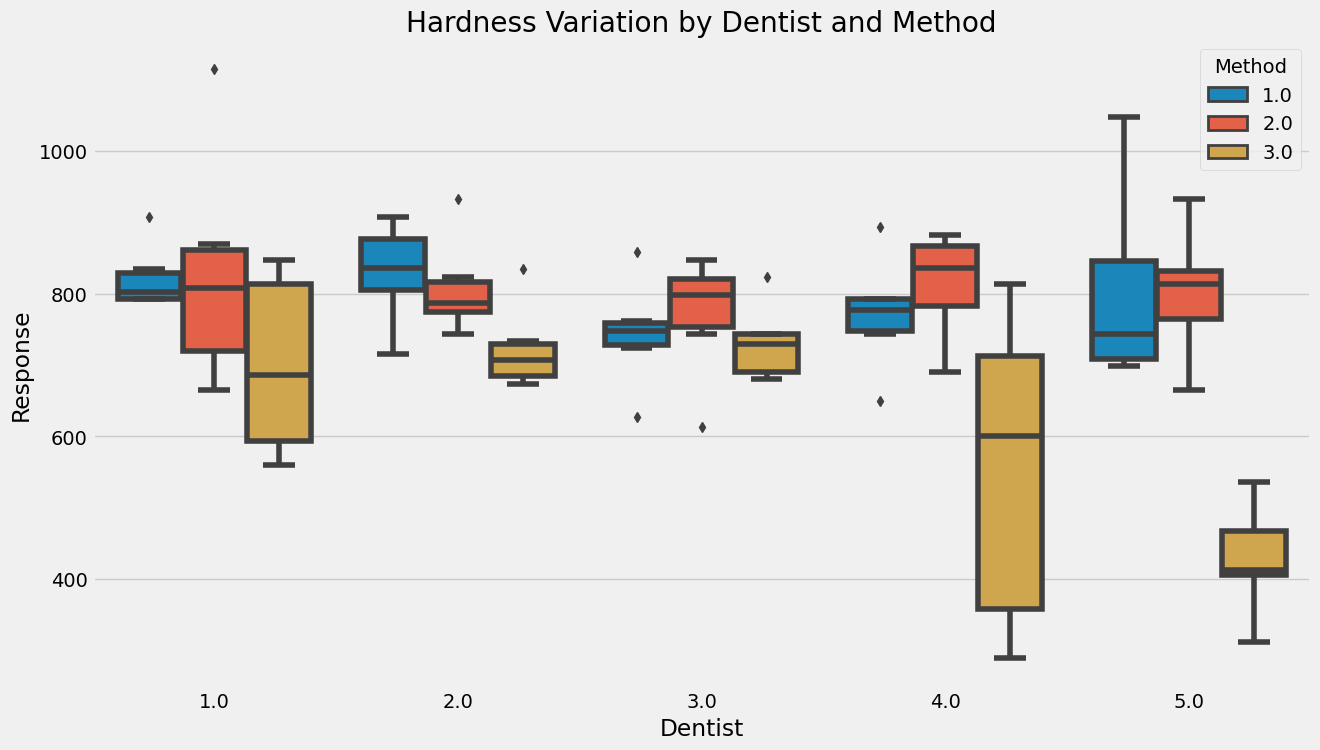

In [90]:
# Box plot to visualize the variation in hardness by both dentist and method
plt.figure(figsize=(14, 8))
sns.boxplot(x="Dentist", y="Response", hue="Method", data=df_dental)
plt.title("Hardness Variation by Dentist and Method")
plt.show()

### Step 7:  Draw inference

Since the p-value is greater than the level of significance at 5%, the null hypothesis fails to be rejected. This means that the Hardness Variation by Dentist and Methods



___